In [312]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import seaborn as sns

In [313]:
siniestros = 'victimas-siniestros.csv'
sin_df = pd.read_csv(siniestros)

C:\Users\Sistemas\AppData\Local\Temp\ipykernel_1148\1239150759.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  sin_df = pd.read_csv(siniestros)


In [314]:
sin_df.head()

causa        rol    tipo       sexo  edad  mes  periodo      fecha  \
0  homicidio  conductor    moto        NaN   NaN  2.0     2015  2/14/2015   
1  homicidio        NaN     NaN        NaN   NaN  2.0     2015  2/25/2015   
2  homicidio     peaton  peaton   femenino   NaN  2.0     2015  2/27/2015   
3  homicidio        NaN     NaN        NaN   NaN  3.0     2015   03-02-15   
4  homicidio   pasajero  camion  masculino   NaN  4.0     2015   04-09-15   

       hora                                     lugar_hecho  ... semestre  \
0  19:00:00     cafayate y severo garcia grande de zequeira  ...        1   
1   3:00:00  lugones, leopoldo av. y udaondo, guillermo av.  ...        1   
2   8:00:00                 avda jujuy y avda independencia  ...        1   
3  18:30:00                                    lavalle 1730  ...        1   
4   1:20:00                  ave salvador m del carril 2434  ...        1   

           x          y                                               geom  \
0 -58.508658 -34.653489  0101000020E610000057E042B51B414DC008419885A553...   
1 -58.447680 -34.543513  0101000020E6100000CC4C4C904D394DC0FAF382D99145...   
2 -58.403516 -34.618839  0101000020E6100000FBC35B67A6334DC03F854E1F364F...   
3 -58.391329 -34.603168  0101000020E6100000312FB20D17324DC064587D9E344D...   
4 -58.492895 -34.587489  0101000020E61000009BDD7231173F4DC02D782AD7324B...   

   cantidad_victimas comuna  \
0                  1    9.0   
1                  1   13.0   
2                  1    3.0   
3                  1    1.0   
4                  1   15.0   

                                           geom_3857           tipo_colision1  \
0  0101000020110F0000DE9B958180D858C1EC802966CD68...  motovehiculo - vehiculo   
1  0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...                      NaN   
2  0101000020110F0000F8067D6812CD58C189755F66A55F...        peaton - vehiculo   
3  0101000020110F00005621683DBFCB58C10B59E69B815B...                      NaN   
4  0101000020110F00006F2F76D4C9D658C1750825735D57...      vehiculo - vehiculo   

  participantes_victimas  participantes_acusados  
0                   moto               automovil  
1                    NaN                     NaN  
2                 peaton    "transporte publico"  
3                    NaN                     NaN  
4                 camion                  camion  

[5 rows x 29 columns]

In [315]:
sin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33234 entries, 0 to 33233
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   causa                         33234 non-null  object 
 1   rol                           32899 non-null  object 
 2   tipo                          32134 non-null  object 
 3   sexo                          33037 non-null  object 
 4   edad                          32675 non-null  float64
 5   mes                           33197 non-null  float64
 6   periodo                       33234 non-null  int64  
 7   fecha                         33173 non-null  object 
 8   hora                          33217 non-null  object 
 9   lugar_hecho                   29518 non-null  object 
 10  direccion_normalizada         32469 non-null  object 
 11  tipo_calle                    33234 non-null  object 
 12  direccion_normalizada_arcgis  32462 non-null  object 
 13  c

In [316]:
mpl.style.use('bmh')

In [317]:
sin_df.value_counts('periodo')

periodo
2015    9903
2016    9880
2017    9742
2018    3709
dtype: int64

In [318]:
sin_poranios = sin_df.loc[sin_df['periodo'] != 2018]
sin_poranios.value_counts('periodo')

periodo
2015    9903
2016    9880
2017    9742
dtype: int64

COMO 2018 TIENE POCOS VALORES NO ME SIRVE PARA LA VISUALIZACION ANUAL QUE QUIERO LOGRAR => LO QUITO

In [319]:
sin_poranios['cant'] = 1

C:\Users\Sistemas\AppData\Local\Temp\ipykernel_1148\2029471356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_poranios['cant'] = 1


In [320]:
g_anios = sin_poranios.groupby(['periodo','mes'])['cant'].sum()
g_anios

periodo  mes 
2015     1.0     645
         2.0     738
         3.0     886
         4.0     877
         5.0     900
         6.0     758
         7.0     863
         8.0     852
         9.0     889
         10.0    810
         11.0    823
         12.0    825
2016     1.0     673
         2.0     734
         3.0     914
         4.0     791
         5.0     951
         6.0     898
         7.0     784
         8.0     841
         9.0     814
         10.0    839
         11.0    859
         12.0    782
2017     1.0     743
         2.0     746
         3.0     767
         4.0     655
         5.0     939
         6.0     786
         7.0     770
         8.0     830
         9.0     773
         10.0    901
         11.0    941
         12.0    891
Name: cant, dtype: int64

In [321]:
g_anios = g_anios.reset_index()
g_anios.head()

periodo  mes  cant
0     2015  1.0   645
1     2015  2.0   738
2     2015  3.0   886
3     2015  4.0   877
4     2015  5.0   900

In [322]:
quince = g_anios[['mes','cant']].loc[g_anios['periodo'] == 2015]
diesiseis = g_anios[['mes','cant']].loc[g_anios['periodo'] == 2016]
diesisiete = g_anios[['mes','cant']].loc[g_anios['periodo'] == 2017]

quince.set_index('mes',inplace=True)
diesiseis.set_index('mes',inplace=True)
diesisiete.set_index('mes',inplace=True)

Text(0.5, 1.0, 'siniestros por mes en 2015, 2016 y 2017')

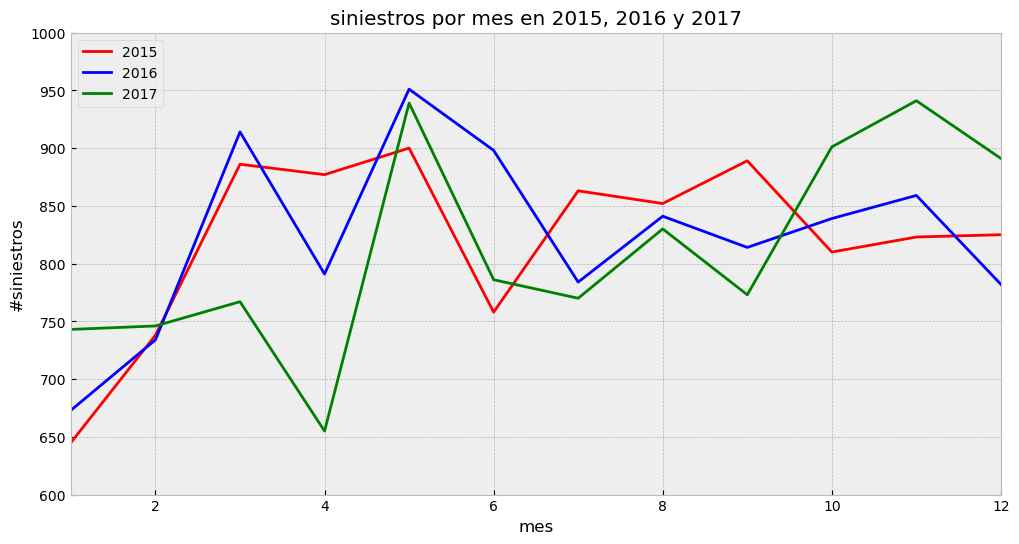

In [323]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(quince, label='2015', color='r')
ax.plot(diesiseis, label='2016', color='b')
ax.plot(diesisiete, label='2017', color='g')
ax.legend()
ax.set_ylim([600,1000])
ax.set_xlim([1,12])
ax.set_xlabel('mes')
ax.set_ylabel('#siniestros')
ax.set_title('siniestros por mes en 2015, 2016 y 2017')

In [324]:
sin_df.value_counts('causa')

causa
lesiones     32795
homicidio      439
dtype: int64

In [325]:
sin_df['cant'] = 1
g_calle = sin_df.groupby(['tipo_calle','causa'])['cant'].sum()
g_calle

tipo_calle  causa    
autopista   homicidio       39
            lesiones       113
avenida     homicidio      295
            lesiones     21100
calle       homicidio      105
            lesiones     11582
Name: cant, dtype: int64

In [326]:
autopista = (g_calle.autopista['homicidio'] / g_calle.autopista['lesiones']) *100
avenida = (g_calle.avenida['homicidio'] / g_calle.avenida['lesiones']) *100
calle = (g_calle.calle['homicidio'] / g_calle.calle['lesiones']) *100

Text(0, 0.5, 'porcentaje de fatalidades')

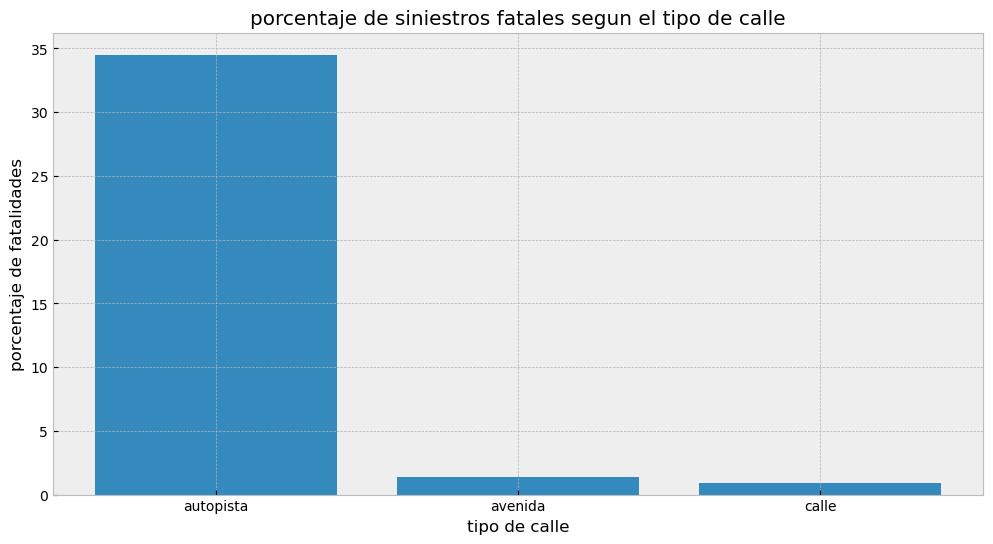

In [327]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(['autopista','avenida','calle'],[autopista,avenida,calle])
ax.set_title('porcentaje de siniestros fatales segun el tipo de calle')
ax.set_xlabel('tipo de calle')
ax.set_ylabel('porcentaje de fatalidades')

LLEGO A LA CONCLUSION QUE EN LA AUTOPISTA HAY ALTAS PROBABILIDADES QUE UN ACCIDENTE SEA FATAL, CASO CONTRARIO A LA AVENIDA O LA CALLE

In [328]:
sin_df.value_counts('tipo')

tipo
moto                                                           13008
peaton                                                          7664
automovil                                                       6273
bicicleta                                                       2059
transporte publico                                              1473
taxi/remis                                                       899
camioneta                                                        343
camion                                                            98
utilitario                                                        85
fuerza seguridad                                                  57
auto pfa / movil / gendarmeria / metropolitana / moto movil       49
ambulancia                                                        41
transporte de cargas / grua                                       39
otros                                                             16
omnibus / minibus            

In [329]:
g_tipo = sin_df.groupby('tipo')['cant'].sum().reset_index()
g_tipo = g_tipo.loc[g_tipo['cant']>60].reset_index(drop=True).sort_values(by='cant',ascending=False)
g_tipo

tipo   cant
4                moto  13008
5              peaton   7664
0           automovil   6273
1           bicicleta   2059
7  transporte publico   1473
6          taxi/remis    899
3           camioneta    343
2              camion     98
8          utilitario     85

In [330]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(g_tipo['tipo'],g_tipo['cant'])
ax.set_title('Cantidad de siniestros por tipo de vehiculo')
ax.set_xlabel('tipo de vehiculo')
ax.set_ylabel('cantidad de siniestros')

Text(0, 0.5, 'cantidad de siniestros')

VEO QUE LA MOTO SUFRE EL DOBLE DE ACCIDENTES QUE EL AUTOMOVIL

In [331]:
fatales = sin_df.loc[sin_df['causa']=='homicidio']
fatales.head()

causa        rol    tipo       sexo  edad  mes  periodo      fecha  \
0  homicidio  conductor    moto        NaN   NaN  2.0     2015  2/14/2015   
1  homicidio        NaN     NaN        NaN   NaN  2.0     2015  2/25/2015   
2  homicidio     peaton  peaton   femenino   NaN  2.0     2015  2/27/2015   
3  homicidio        NaN     NaN        NaN   NaN  3.0     2015   03-02-15   
4  homicidio   pasajero  camion  masculino   NaN  4.0     2015   04-09-15   

       hora                                     lugar_hecho  ...          x  \
0  19:00:00     cafayate y severo garcia grande de zequeira  ... -58.508658   
1   3:00:00  lugones, leopoldo av. y udaondo, guillermo av.  ... -58.447680   
2   8:00:00                 avda jujuy y avda independencia  ... -58.403516   
3  18:30:00                                    lavalle 1730  ... -58.391329   
4   1:20:00                  ave salvador m del carril 2434  ... -58.492895   

           y                                               geom  \
0 -34.653489  0101000020E610000057E042B51B414DC008419885A553...   
1 -34.543513  0101000020E6100000CC4C4C904D394DC0FAF382D99145...   
2 -34.618839  0101000020E6100000FBC35B67A6334DC03F854E1F364F...   
3 -34.603168  0101000020E6100000312FB20D17324DC064587D9E344D...   
4 -34.587489  0101000020E61000009BDD7231173F4DC02D782AD7324B...   

  cantidad_victimas  comuna  \
0                 1     9.0   
1                 1    13.0   
2                 1     3.0   
3                 1     1.0   
4                 1    15.0   

                                           geom_3857           tipo_colision1  \
0  0101000020110F0000DE9B958180D858C1EC802966CD68...  motovehiculo - vehiculo   
1  0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...                      NaN   
2  0101000020110F0000F8067D6812CD58C189755F66A55F...        peaton - vehiculo   
3  0101000020110F00005621683DBFCB58C10B59E69B815B...                      NaN   
4  0101000020110F00006F2F76D4C9D658C1750825735D57...      vehiculo - vehiculo   

   participantes_victimas participantes_acusados  cant  
0                    moto              automovil     1  
1                     NaN                    NaN     1  
2                  peaton   "transporte publico"     1  
3                     NaN                    NaN     1  
4                  camion                 camion     1  

[5 rows x 30 columns]

In [332]:
fatales[['tipo','tipo_colision1']]

tipo           tipo_colision1
0           moto  motovehiculo - vehiculo
1            NaN                      NaN
2         peaton        peaton - vehiculo
3            NaN                      NaN
4         camion      vehiculo - vehiculo
...          ...                      ...
25109     peaton        peaton - vehiculo
25110     peaton        peaton - vehiculo
25111     peaton        peaton - vehiculo
25112  automovil      vehiculo - vehiculo
25113     peaton        peaton - vehiculo

[439 rows x 2 columns]

In [333]:
fatales = fatales.groupby('participantes_acusados')['cant'].sum().reset_index().sort_values(by='cant',ascending=False)
fatales = fatales.loc[fatales['cant']>3]
fatales

participantes_acusados  cant
8               automovil   141
5    "transporte publico"   105
14                 camion    67
16                   moto    43
20             utilitario    15
15              camioneta     8
17             taxi/remis     6

Text(0.5, 1.0, 'vehiculo causante de accidentes fatales')

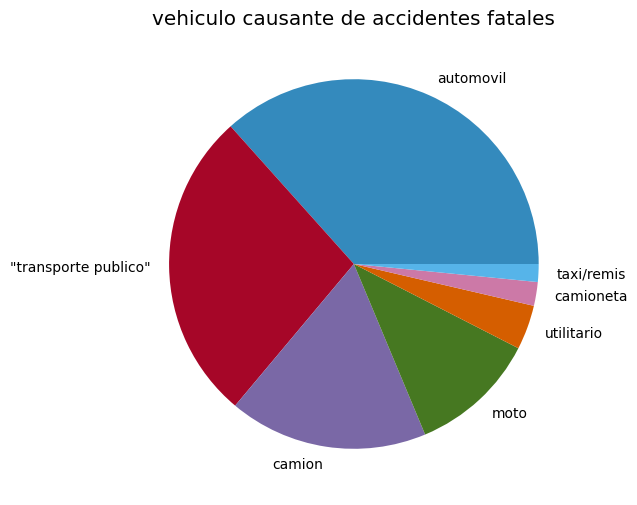

In [334]:
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(x=fatales['cant'],labels=fatales['participantes_acusados'])
ax.set_title('vehiculo causante de accidentes fatales')

A PESAR DE SER LA MOTO LA IMPLICADA EN MAS SINIESTROS, EL AUTOMOVIL ES EL CAUSANTE DE MAS SINIESTROS FATALES

In [335]:
motos_autos = sin_df.loc[(sin_df['tipo']=='moto') | (sin_df['tipo']=='automovil')]
motos_autos.head()

causa        rol       tipo       sexo  edad  mes  periodo      fecha  \
0  homicidio  conductor       moto        NaN   NaN  2.0     2015  2/14/2015   
5  homicidio  conductor       moto        NaN   NaN  4.0     2015  4/30/2015   
6  homicidio  conductor       moto  masculino  18.0  1.0     2015   01-01-15   
7   lesiones   pasajero  automovil  masculino  26.0  1.0     2015   01-01-15   
8  homicidio  conductor       moto  masculino  24.0  3.0     2015  3/14/2015   

       hora                                  lugar_hecho  ...          x  \
0  19:00:00  cafayate y severo garcia grande de zequeira  ... -58.508658   
5  23:30:00                          lima y carlos calvo  ... -58.381446   
6   2:20:00                   piedras y av independencia  ... -58.377362   
7   7:10:00                                  2850 yerbal  ... -58.469471   
8   4:30:00         av gral paz colectora y jorge chavez  ... -58.528416   

           y                                               geom  \
0 -34.653489  0101000020E610000057E042B51B414DC008419885A553...   
5 -34.619754  0101000020E6100000A578AF3AD3304DC05596001B544F...   
6 -34.617451  0101000020E6100000321A04664D304DC00ACBACA3084F...   
7 -34.629286  0101000020E61000009B159BA0173C4DC000EC376E8C50...   
8 -34.650157  0101000020E61000007F0ED022A3434DC09D58EF5A3853...   

  cantidad_victimas  comuna  \
0                 1     9.0   
5                 1     1.0   
6                 1     1.0   
7                 1     7.0   
8                 1     9.0   

                                           geom_3857  \
0  0101000020110F0000DE9B958180D858C1EC802966CD68...   
5  0101000020110F0000D1414037ACCA58C196726649E35F...   
6  0101000020110F00005859A78D3ACA58C1C303A885475F...   
7  0101000020110F0000A198A1EF3DD458C122046FFB6762...   
8  0101000020110F000032A9EF5DA6DA58C1C5A834FCEB67...   

                tipo_colision1  participantes_victimas participantes_acusados  \
0      motovehiculo - vehiculo                    moto              automovil   
5      motovehiculo - vehiculo                    moto              automovil   
6      motovehiculo - vehiculo                    moto              automovil   
7          vehiculo - vehiculo               automovil              automovil   
8  motovehiculo - motovehiculo                    moto                   moto   

   cant  
0     1  
5     1  
6     1  
7     1  
8     1  

[5 rows x 30 columns]

In [336]:
g_motos_autos = motos_autos.groupby(['tipo','sexo'])['cant'].sum().reset_index()

Text(0, 0.5, 'Cantidad de siniestros')

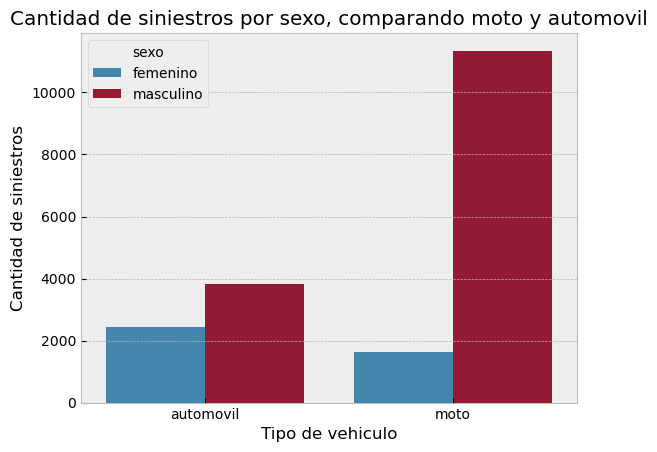

In [337]:
ax = sns.barplot(data=g_motos_autos, x='tipo', y='cant', hue='sexo')
ax.set_title('Cantidad de siniestros por sexo, comparando moto y automovil')
ax.set_xlabel('Tipo de vehiculo')
ax.set_ylabel('Cantidad de siniestros')

PUEDO CORROBORAR CON ESTE GRAFICO QUE EL SEXO MASCULINO ES EN PORCENTAJE MUCHO MAYOR AL FEMENINO EN LOS ACCIDENTES EN MOTO, EN COMPARACION A LOS ACCIDENTES EN AUTOMOVIL

In [338]:
sin_df.value_counts('cantidad_victimas')

cantidad_victimas
1     28436
2      3476
3       674
4       368
6       100
5        67
7        40
8        31
9        18
12       12
17        6
18        6
dtype: int64

In [339]:
motos_autos = motos_autos.loc[motos_autos['cantidad_victimas']<7]
victimas = motos_autos.groupby(['tipo','cantidad_victimas'])['cant'].sum().reset_index()
victimas

tipo  cantidad_victimas   cant
0   automovil                  1   4613
1   automovil                  2   1110
2   automovil                  3    319
3   automovil                  4    168
4   automovil                  5     13
5   automovil                  6     42
6        moto                  1  11932
7        moto                  2    983
8        moto                  3     79
9        moto                  4     12
10       moto                  5      2

Text(0, 0.5, 'Cantidad de siniestros')

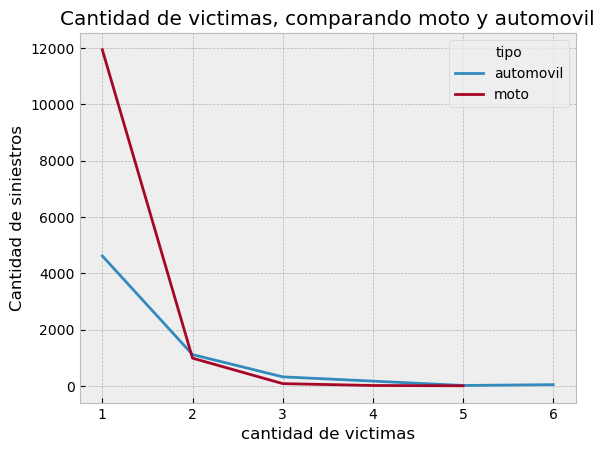

In [340]:
ax = sns.lineplot(data=victimas, x='cantidad_victimas', y='cant', hue='tipo')
ax.set_title('Cantidad de victimas, comparando moto y automovil')
ax.set_xlabel('cantidad de victimas')
ax.set_ylabel('Cantidad de siniestros')

In [341]:
sin_df.value_counts('tipo_colision1')

tipo_colision1
motovehiculo - vehiculo             8400
vehiculo - vehiculo                 6384
peaton - vehiculo                   4464
multiple                            4285
vehiculo - motovehiculo             2995
motovehiculo - peaton               1429
bicicleta - vehiculo                1384
vehiculo - peaton                   1191
motovehiculo - motovehiculo          622
vehiculo - bicicleta                 394
bicicleta - motovehiculo             193
bicicleta - peaton                   116
bicicleta - bicicleta                 19
peaton - peaton                       10
traccion a sangre - vehiculo           2
motovehiculo - traccion a sangre       1
motovehiculo - tren                    1
subte - vehiculo                       1
dtype: int64

ASUMO QUE EL DE LA IZQUIERDA ES EL CAUSANTE DEL SINIESTRO Y EL DE LA IZQUIERDA ES LA VICTIMA (segun la culpa del accidente)

SEPARO EL VEHICULO VICTIMA DEL SINIESTRO PARA SACAR CONCLUSIONES

In [342]:
def vistima(st):
    if (type(st) == str):
        if '-' in st:
            st = st.split(' - ')[1]
        else:
            st = 'multiple'
    else:
        st = 'sin_datos'
    return st

In [343]:
sin_df['tipo_victima'] = sin_df['tipo_colision1'].convert_dtypes().apply(vistima)
sin_df.value_counts('tipo_victima')

tipo_victima
vehiculo             20635
multiple              4285
motovehiculo          3810
peaton                2746
sin_datos             1343
bicicleta              413
traccion a sangre        1
tren                     1
dtype: int64

In [344]:
chocados = sin_df.loc[sin_df['tipo_victima'].str.contains('vehiculo|peaton|bicicleta|multiple')]
chocados = chocados.groupby(['tipo_victima','sexo'])['cant'].sum().reset_index()
chocados

tipo_victima       sexo   cant
0     bicicleta   femenino    117
1     bicicleta  masculino    296
2  motovehiculo   femenino    496
3  motovehiculo  masculino   3308
4      multiple   femenino   1804
5      multiple  masculino   2345
6        peaton   femenino   1383
7        peaton  masculino   1360
8      vehiculo   femenino   6323
9      vehiculo  masculino  14281

In [345]:
ax = sns.barplot(data=chocados, x='tipo_victima', y='cant', hue='sexo')

PUEDO VER EN EL GRAFICO QUE SI LA VICTIMA ES UN PEATON HAY CASI LA MISMA PROBABILIDAD DE QUE SEA HOMBRE O MUJER
POR EL CONTRARIO, CUANDO LA VICTIMA ES UN VEHICULO MOTORIZADO O UNA BICICLETA, LO MAS PROBABLE ES QUE LA VICTIMA SEA HOMBRE

In [346]:
chocados2 = sin_df.loc[sin_df['tipo_victima'].str.contains('vehiculo|peaton|bicicleta|multiple')]
chocados2 = chocados2.groupby(['comuna','tipo_victima'])['cant'].sum().reset_index()
chocados2.head()

comuna  tipo_victima  cant
0     1.0     bicicleta    65
1     1.0  motovehiculo   475
2     1.0      multiple   596
3     1.0        peaton   488
4     1.0      vehiculo  2651

In [347]:
total_comunas = chocados2.groupby('comuna')['cant'].sum().reset_index()
total_comunas = total_comunas.sort_values(by='cant',ascending=False).head(6)

In [348]:
chocados2 = chocados2.merge(total_comunas,right_on='comuna',left_on='comuna')
chocados2.head()

comuna  tipo_victima  cant_x  cant_y
0     1.0     bicicleta      65    4275
1     1.0  motovehiculo     475    4275
2     1.0      multiple     596    4275
3     1.0        peaton     488    4275
4     1.0      vehiculo    2651    4275

In [349]:
chocados2['porcentaje'] = ((chocados2['cant_x']/chocados2['cant_y'])*100).astype(int)
chocados2 = chocados2[['comuna','tipo_victima','porcentaje']]
chocados2['comuna'] = chocados2['comuna'].astype(int).astype(str)
chocados2.head()

comuna  tipo_victima  porcentaje
0      1     bicicleta           1
1      1  motovehiculo          11
2      1      multiple          13
3      1        peaton          11
4      1      vehiculo          62

Text(0, 0.5, 'Porcentaje de siniestros')

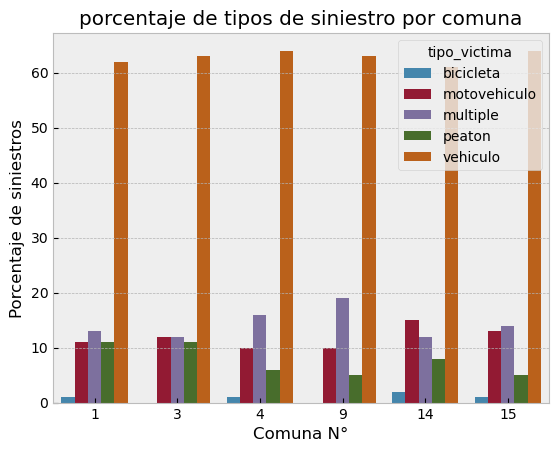

In [350]:
ax = sns.barplot(chocados2, x='comuna',y='porcentaje',hue='tipo_victima')
ax.set_title('porcentaje de tipos de siniestro por comuna')
ax.set_xlabel('Comuna N°')
ax.set_ylabel('Porcentaje de siniestros')

LUEGO DE FILTRAR LAS COMUNAS CON MAS ACCIDENTES COMPARO EL PORCENTAJE DE TIPOS DE VEHICULO "VICTIMA" EN ESTAS COMUNAS
EL "VEHICULO" ES EL MAS IMPLICADO EN ACCIDENTES EN TODAS LAS COMUNAS POR IGUAL
POR ULTIMO PODEMOS VER QUE LOS OTROS TIPOS DE VICTIMA VARÍAN MAS EN LAS COMUNAS 4, 9, 14 y 15 QUE EN LAS COMUNAS 1 y 3